In [6]:
class Value:
    def __init__(self, v, children=(),label="", op=""):
        self.v = v
        self.children = children
        self.label = label
        self.op = op

    def __repr__(self):
        return f"{self.label} | data = {self.v} | grad = {self.grad} "

    def __add__(self, other):
        newv = self.v + other.v
        return Value(newv,(self, other),label="", op="+")
        

    def __mul__(self, other):
        newv = self.v * other.v
        return Value(newv,(self, other),label="", op="*")

    def __sub__(self, other):
        newv = self.v - other.v
        return Value(newv,(self, other),label="", op="-")

    def __div__(self, other):
        assert not other.v == 0
        newv = self.v  / other.v
        return Value(newv,(self, other),label="", op="*")
    
    def sigmod(self):
        import numpy as np
        g=lambda x:1/(1+np.exp(-x))
        newv = g(self.v)
        return Value(newv, (self,), label="", op="sigmod")

In [2]:
# draw the math expressions here using graphiviz
import graphviz
graphviz.set_jupyter_format(jupyter_format='svg') # make it adapter to the jupyter

def draw_graph(root: Value):
    g = graphviz.Digraph(graph_attr={"rankdir":"LR"})
    def __draw_by_node(root:Value, g: graphviz.Digraph):
        if repr(root) not in g.body:
            g.node(root.label, repr(root),shape="box")
        if not len(root.children) == 0:
            op_node = f"{root.label} | {root.op}"
            g.node(op_node, root.op, shape="circle")
            g.edge(op_node, root.label)
            for child in root.children:
                g.node(child.label, repr(child), shape="box")
                g.edge(child.label, op_node)
                __draw_by_node(child,g)
    __draw_by_node(root, g)
    return g
    

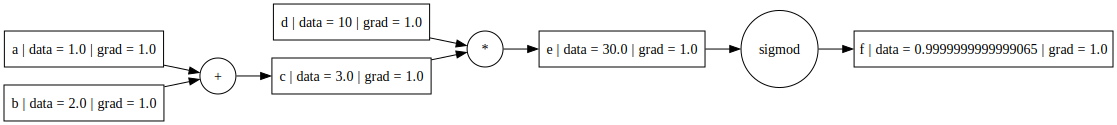

In [7]:
a = Value(1.0, label="a")
b = Value(2.0, label="b")
c = a + b
c.label = "c"
d = Value(10, label="d")
e = d * c
e.label = "e"
f = e.sigmod()
f.label = "f"

draw_graph(f)


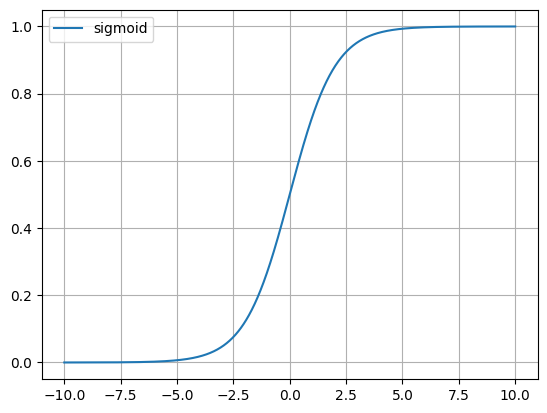

In [8]:
# involve the sigmod activation function

#导入相关库
import matplotlib.pyplot as plt
import numpy as np 

#函数
g=lambda x:1/(1+np.exp(-x))

start=-10 #输入需要绘制的起始值（从左到右）
stop=10 #输入需要绘制的终点值
step=0.01#输入步长
num=int((stop-start)/step) #计算点的个数 , fix the float conert to int bug
x = np.linspace(start,stop,num)
y = g(x)

fig=plt.figure(1)
plt.plot(x, y,label='sigmoid')
plt.grid(True)#显示网格

plt.legend()#显示旁注#注意：不会显示后来再定义的旁注
plt.show(fig)

In [9]:
# calculate the direvative of sigmod ,using dy/dx
a = Value(1.0, label="a")
b = Value(2.0, label="b")
c = a + b
c.label = "c"
d = Value(10, label="d")
e = d * c
e.label = "e"
f1 = e.sigmod()
f.label = "f"

delta = 0.001
e.v += delta
f2 = e.sigmod()
grad = (f2.v - f1.v) / delta

grad


0.0